In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [45]:
covid =pd.read_csv('/content/Coronavirus Tweets.csv')
covid.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc2 in position 7485: invalid continuation byte

In [46]:

covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12130 entries, 0 to 12129
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       12130 non-null  int64 
 1   ScreenName     12130 non-null  int64 
 2   Location       9566 non-null   object
 3   TweetAt        12130 non-null  object
 4   OriginalTweet  12130 non-null  object
 5   Sentiment      12129 non-null  object
dtypes: int64(2), object(4)
memory usage: 568.7+ KB


In [47]:
covid.describe()

,UserName,ScreenName
count,12130.000000,12130.000000
mean,9863.500000,54815.500000
std,3501.773717,3501.773717
min,3799.000000,48751.000000
25%,6831.250000,51783.250000
50%,9863.500000,54815.500000
75%,12895.750000,57847.750000
max,15928.000000,60880.000000


In [48]:
covid.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [49]:
covid.shape

(12130, 6)

In [50]:
covid.isnull().sum()

UserName            0
ScreenName          0
Location         2564
TweetAt             0
OriginalTweet       0
Sentiment           1
dtype: int64

In [51]:
covid.isna().sum()

UserName            0
ScreenName          0
Location         2564
TweetAt             0
OriginalTweet       0
Sentiment           1
dtype: int64

In [98]:
most_frequent_sentiment = covid['Sentiment'].mode()[0]
covid['Sentiment'].fillna(most_frequent_sentiment, inplace=True)



In [99]:
covid.isna().sum()

UserName            0
ScreenName          0
Location         2564
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [100]:
covid1=covid[['OriginalTweet','Sentiment']]
covid1.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [101]:
covid1.describe().T

,count,unique,top,freq
OriginalTweet,12130,12130,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
Sentiment,12130,5,Positive,3234


In [102]:
covid1.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [103]:
covid1.shape

(12130, 2)

In [104]:
len(covid1[covid1.duplicated()])

0

In [105]:
covid1["OriginalTweet"] = covid1["OriginalTweet"].str.lower()
covid1['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
12125    all the years people were dissing supermarket ...
12126    panic buyers will gain some food but lose thei...
12127    the spca have lowered their pet adoption price...
12128    i m out of work due to covid 19 so any support...
12129                                              stop se
Name: OriginalTweet, Length: 12130, dtype: object

In [107]:
covid1['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [108]:
covid1['OriginalTweet'] = covid1['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [109]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [110]:
covid1["clean_tweets"] = covid1['OriginalTweet'].apply(remove_punctuations)

In [111]:
covid1['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
12125    all the years people were dissing supermarket ...
12126    panic buyers will gain some food but lose thei...
12127    the spca have lowered their pet adoption price...
12128    i m out of work due to covid 19 so any support...
12129                                              stop se
Name: clean_tweets, Length: 12130, dtype: object

In [112]:
covid1['clean_tweets'] = covid1['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
covid1.head()

,OriginalTweet,Sentiment,clean_tweets
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,my food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,me ready to go at supermarket during the covid...


In [113]:
covid1['clean_tweets'][0]

'menyrbie philgahan chrisitv  and  and '

In [114]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [115]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)



In [116]:
covid1['clean_tweets']= covid1['clean_tweets'].apply(lambda x: remove_stopwords(x))

In [117]:
covid1.clean_tweets[6]

['cashier',
 'grocery',
 'store',
 'sharing',
 'insights',
 'covid',
 'prove',
 'credibility',
 'commented',
 'im',
 'civics',
 'class',
 'know',
 'im',
 'talking']

In [118]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [119]:
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [120]:
covid1['stemmed'] = covid1['clean_tweets'].apply(lambda x: stemming(x))

In [121]:
covid1.stemmed.head()

0                           menyrbi philgahan chrisitv
1    advic talk neighbour famili exchang phone numb...
2    coronaviru australia woolworth give elderli di...
3    food stock one empti pleas dont panic enough f...
4    readi go supermarket covid outbreak im paranoi...
Name: stemmed, dtype: object

In [134]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
covid1['lemmed'] = covid1['clean_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [135]:
covid1.head()

,OriginalTweet,Sentiment,clean_tweets,stemmed,temp_list,lemmed
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,"[['menyrbie',, 'philgahan',, 'chrisitv']]","[menyrbie, philgahan, chrisitv]"
1,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,"[['advice',, 'talk',, 'neighbours',, 'family',...","[advice, talk, neighbour, family, exchange, ph..."
2,coronavirus australia: woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,"[['coronavirus',, 'australia',, 'woolworths',,...","[coronavirus, australia, woolworth, give, elde..."
3,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,"[['food',, 'stock',, 'one',, 'empty',, 'please...","[food, stock, one, empty, please, dont, panic,..."
4,"me, ready to go at supermarket during the #cov...",Negative,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...,"[['ready',, 'go',, 'supermarket',, 'covid',, '...","[ready, go, supermarket, covid, outbreak, im, ..."


In [136]:
sentiment_count = covid1['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,4999
1,Negative,4988
2,Neutral,2143


Text(0, 0.5, 'count')

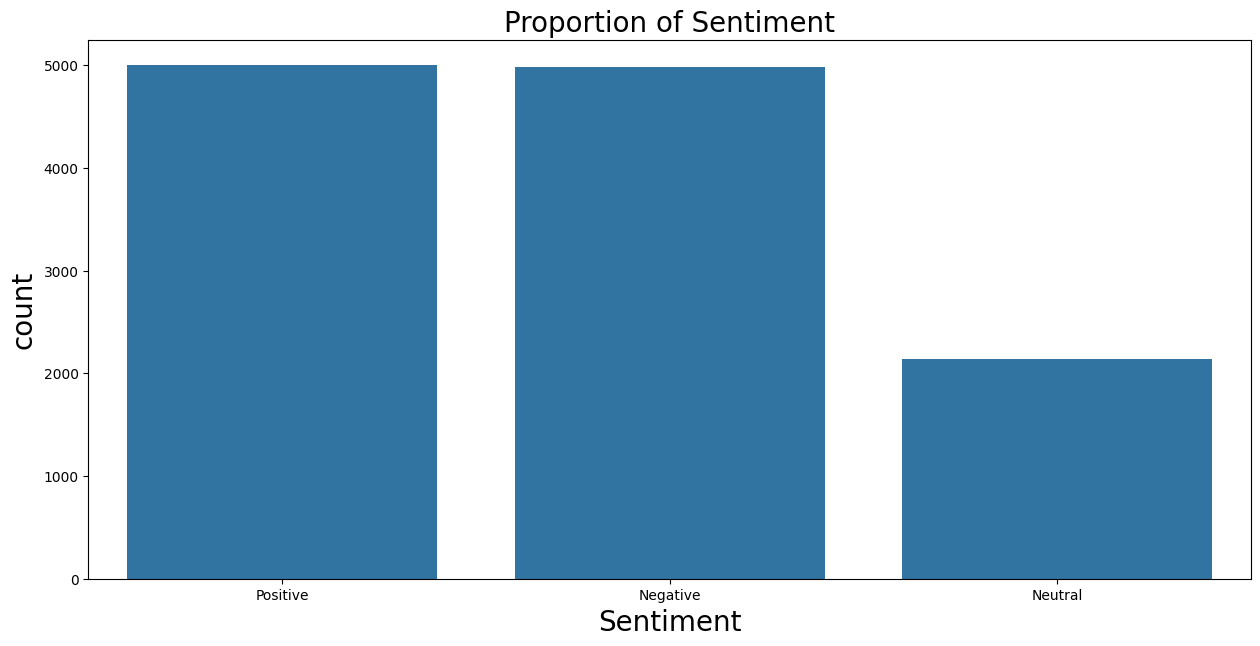

In [137]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

In [138]:
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
covid1 = covid1.replace(replace_values)

In [139]:
sentiment_count1 = covid1['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,4999
1,Negative,4988
2,Neutral,2143


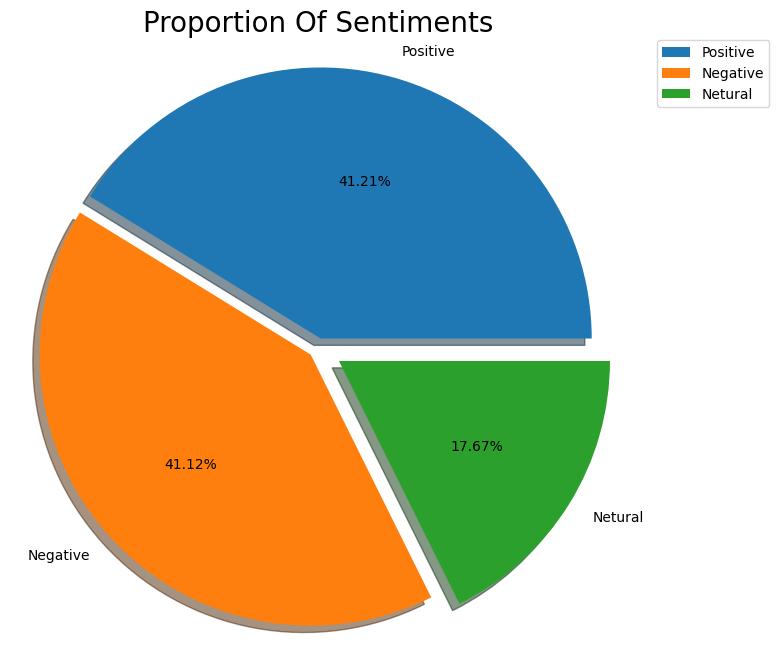

In [140]:
sentiment_count1 = covid1['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [141]:
covid1['temp_list'] = covid1['clean_tweets'].apply(lambda x:str(x).split())

In [142]:
from collections import Counter
top = Counter([item for sublist in covid1['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,"'covid',",5118
1,"'coronavirus',",4171
2,"'store',",2692
3,"'food',",2376
4,"'grocery',",2293
5,"'supermarket',",2122
6,"'people',",1883
7,"'prices',",1843
8,'coronavirus'],1525
9,"'amp',",1411


In [143]:
neutral = pd.DataFrame(covid1[['stemmed','lemmed']] [covid1['Sentiment'] == 'Neutral'])
positive = pd.DataFrame(covid1[['stemmed','lemmed']]  [covid1['Sentiment'] == 'Positive'])
negative = pd.DataFrame(covid1[['stemmed','lemmed']]  [covid1['Sentiment'] == 'Negative'])

In [145]:
X= covid1['lemmed']
y=covid1['Sentiment']

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [147]:
print(X_train.shape)
y_test.shape

(8491,)


(3639,)

In [148]:
print(X_train.head())
y_train.head()

6256    [small, grocery, run, today, purchased, item, ...
5796    [go, grocery, store, looked, mirror, look, lik...
1138    [shopper, drug, mart, hike, price, amid, coron...
3241    [coronavirus, alert, understand, important, ev...
5357    [virusspooked, russian, hoard, trusty, staple,...
Name: lemmed, dtype: object


6256    Positive
5796    Positive
1138     Neutral
3241    Positive
5357    Positive
Name: Sentiment, dtype: object

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

In [150]:
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())

In [151]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())

In [152]:
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)
logreg_Gcv.fit(cv_X_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [153]:
pred_lr_cv = logreg_Gcv.predict(cv_X_test)

In [ ]:
pred_lr_cv

In [155]:
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7056883759274526


In [157]:

label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

    Negative       0.74      0.73      0.73      1496
     Neutral       0.56      0.57      0.56       643
    Positive       0.74      0.74      0.74      1500

    accuracy                           0.71      3639
   macro avg       0.68      0.68      0.68      3639
weighted avg       0.71      0.71      0.71      3639



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

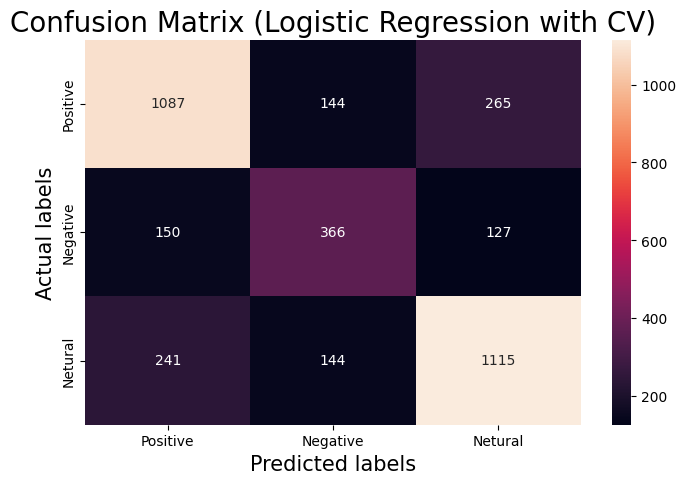

In [158]:
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [159]:
dt_cv=DecisionTreeClassifier()
dt_cv.fit(cv_X_train,y_train)
pred_dt_cv=dt_cv.predict(cv_X_test)

In [160]:
pred_dt_cv

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [161]:
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.6161826640904959


In [162]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.65      0.61      0.63      1496
     Neutral       0.47      0.56      0.51       643
    Positive       0.67      0.65      0.66      1500

    accuracy                           0.62      3639
   macro avg       0.60      0.61      0.60      3639
weighted avg       0.63      0.62      0.62      3639



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

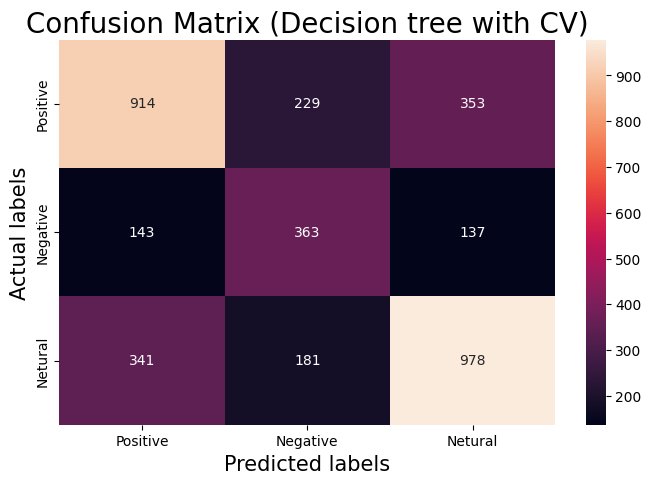

In [163]:
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [164]:
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(cv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(cv_X_test)

In [165]:
pred_svm_cv

array(['Positive', 'Neutral', 'Positive', ..., 'Positive', 'Positive',
       'Neutral'], dtype=object)

In [166]:
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.6999175597691674


In [167]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.74      0.72      0.73      1496
     Neutral       0.56      0.57      0.57       643
    Positive       0.72      0.74      0.73      1500

    accuracy                           0.70      3639
   macro avg       0.67      0.68      0.67      3639
weighted avg       0.70      0.70      0.70      3639



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

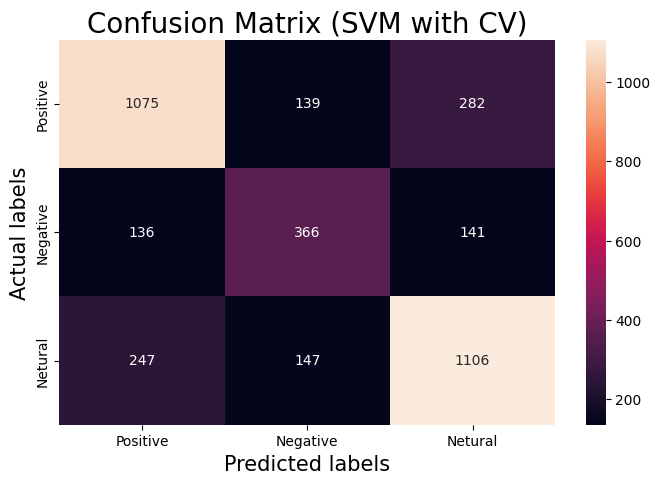

In [168]:
cf5= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)